# **0. PREPARATION AND LIBRARIES**

In [1]:
!pip install opendatasets

In [2]:
! pip install ultralytics

In [3]:
import os

In [4]:
import random
import opendatasets as od
import cv2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import sys
import os

from ultralytics import YOLO
%matplotlib inline

In [5]:
# drive.mount('/content/drive')

In [6]:
# move to preferred working directory

# %cd "/content/drive/MyDrive/REA Projects/Object Detection/Playing Card Detection"

In [7]:
# set working directory

HOME = os.getcwd()
print(HOME)

/home


# **1. DOWNLOAD DATASET**

In [8]:
# define train, valid, test directories


train_images = os.path.join(HOME, "playing-cards-object-detection-dataset/train/images")
train_labels = os.path.join(HOME, "playing-cards-object-detection-dataset/train/labels")

valid_images = os.path.join(HOME, "playing-cards-object-detection-dataset/valid/images")
valid_labels = os.path.join(HOME, "playing-cards-object-detection-dataset/valid/labels")

test_images = os.path.join(HOME, "playing-cards-object-detection-dataset/test/images")
test_labels = os.path.join(HOME, "playing-cards-object-detection-dataset/test/labels")

yaml_path = os.path.join(HOME, "playing-cards-object-detection-dataset/data.yaml")

In [9]:
print(train_images)
print(valid_images)
print(test_images)


/home/playing-cards-object-detection-dataset/train/images
/home/playing-cards-object-detection-dataset/valid/images
/home/playing-cards-object-detection-dataset/test/images


In [10]:
yaml_path

'/home/playing-cards-object-detection-dataset/data.yaml'

In [11]:
# Configure YAML

# %writefile "$yaml_path"

# train: ./playing-cards-object-detection-dataset/train/images
# val: ./playing-cards-object-detection-dataset/val/images
# test: ./playing-cards-object-detection-dataset/test/images

# nc: 52
# names: ['10c', '10d', '10h', '10s', '2c', '2d', '2h', '2s', '3c', '3d', '3h', '3s', '4c', '4d', '4h', '4s', '5c', '5d', '5h', '5s', '6c', '6d', '6h', '6s', '7c', '7d', '7h', '7s', '8c', '8d', '8h', '8s', '9c', '9d', '9h', '9s', 'Ac', 'Ad', 'Ah', 'As', 'Jc', 'Jd', 'Jh', 'Js', 'Kc', 'Kd', 'Kh', 'Ks', 'Qc', 'Qd', 'Qh', 'Qs']

In [12]:
# Define the YAML content as a string
yaml_content = """
train: ./playing-cards-object-detection-dataset/train/images
val: ./playing-cards-object-detection-dataset/valid/images
test: ./playing-cards-object-detection-dataset/test/images

nc: 52
names: ['10c', '10d', '10h', '10s', '2c', '2d', '2h', '2s', '3c', '3d', '3h', '3s', '4c', '4d', '4h', '4s', '5c', '5d', '5h', '5s', '6c', '6d', '6h', '6s', '7c', '7d', '7h', '7s', '8c', '8d', '8h', '8s', '9c', '9d', '9h', '9s', 'Ac', 'Ad', 'Ah', 'As', 'Jc', 'Jd', 'Jh', 'Js', 'Kc', 'Kd', 'Kh', 'Ks', 'Qc', 'Qd', 'Qh', 'Qs']
"""

# Write the YAML content to a file
# with open(yaml_path, 'w') as file:
  #  file.write(yaml_content)

In [13]:
# Define the labels

classes = ['10c', '10d', '10h', '10s', '2c', '2d', '2h', '2s', '3c', '3d', '3h', '3s', '4c', '4d', '4h', '4s', '5c', '5d', '5h', '5s', '6c', '6d', '6h', '6s', '7c', '7d', '7h', '7s', '8c', '8d', '8h', '8s', '9c', '9d', '9h', '9s', 'Ac', 'Ad', 'Ah', 'As', 'Jc', 'Jd', 'Jh', 'Js', 'Kc', 'Kd', 'Kh', 'Ks', 'Qc', 'Qd', 'Qh', 'Qs']

Idx2Label = {idx: label for idx, label in enumerate(classes)}
Label2Index = {label: idx for idx, label in Idx2Label.items()}

print('Index to Label Mapping:', Idx2Label)
print('Label to Index Mapping:', Label2Index)

Index to Label Mapping: {0: '10c', 1: '10d', 2: '10h', 3: '10s', 4: '2c', 5: '2d', 6: '2h', 7: '2s', 8: '3c', 9: '3d', 10: '3h', 11: '3s', 12: '4c', 13: '4d', 14: '4h', 15: '4s', 16: '5c', 17: '5d', 18: '5h', 19: '5s', 20: '6c', 21: '6d', 22: '6h', 23: '6s', 24: '7c', 25: '7d', 26: '7h', 27: '7s', 28: '8c', 29: '8d', 30: '8h', 31: '8s', 32: '9c', 33: '9d', 34: '9h', 35: '9s', 36: 'Ac', 37: 'Ad', 38: 'Ah', 39: 'As', 40: 'Jc', 41: 'Jd', 42: 'Jh', 43: 'Js', 44: 'Kc', 45: 'Kd', 46: 'Kh', 47: 'Ks', 48: 'Qc', 49: 'Qd', 50: 'Qh', 51: 'Qs'}
Label to Index Mapping: {'10c': 0, '10d': 1, '10h': 2, '10s': 3, '2c': 4, '2d': 5, '2h': 6, '2s': 7, '3c': 8, '3d': 9, '3h': 10, '3s': 11, '4c': 12, '4d': 13, '4h': 14, '4s': 15, '5c': 16, '5d': 17, '5h': 18, '5s': 19, '6c': 20, '6d': 21, '6h': 22, '6s': 23, '7c': 24, '7d': 25, '7h': 26, '7s': 27, '8c': 28, '8d': 29, '8h': 30, '8s': 31, '9c': 32, '9d': 33, '9h': 34, '9s': 35, 'Ac': 36, 'Ad': 37, 'Ah': 38, 'As': 39, 'Jc': 40, 'Jd': 41, 'Jh': 42, 'Js': 43, 'K

# **2. EXPLORE DATASET**

In [14]:
def visualize_image_with_annotation_bboxes(image_dir, label_dir):
    # Get list of all the image files in the directory
    image_files = sorted(os.listdir(image_dir))

    # Choose 10 random image files from the list
    sample_image_files = random.sample(image_files, 12)

    # Set up the plot
    fig, axs = plt.subplots(4, 3, figsize=(15, 20))

    # Loop over the random images and plot the bounding boxes
    for i, image_file in enumerate(sample_image_files):
        row = i // 3
        col = i % 3

        # Load the image
        image_path = os.path.join(image_dir, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Load the labels for this image
        label_path = os.path.join(label_dir, image_file[:-4] + '.txt')
        f = open(label_path, 'r')

        # Loop over the labels and plot the bounding boxes
        for label in f:
            class_id, x_center, y_center, width, height = map(float, label.split())
            h, w, _ = image.shape
            x_min = int((x_center - width/2) * w)
            y_min = int((y_center - height/2) * h)
            x_max = int((x_center + width/2) * w)
            y_max = int((y_center + height/2) * h)
            cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
            cv2.putText(image, Idx2Label[int(class_id)], (x_min, y_min), cv2.FONT_HERSHEY_SIMPLEX, fontScale=1, color=(255, 255, 255), thickness=2)

        axs[row, col].imshow(image)
        axs[row, col].axis('off')

    plt.show()

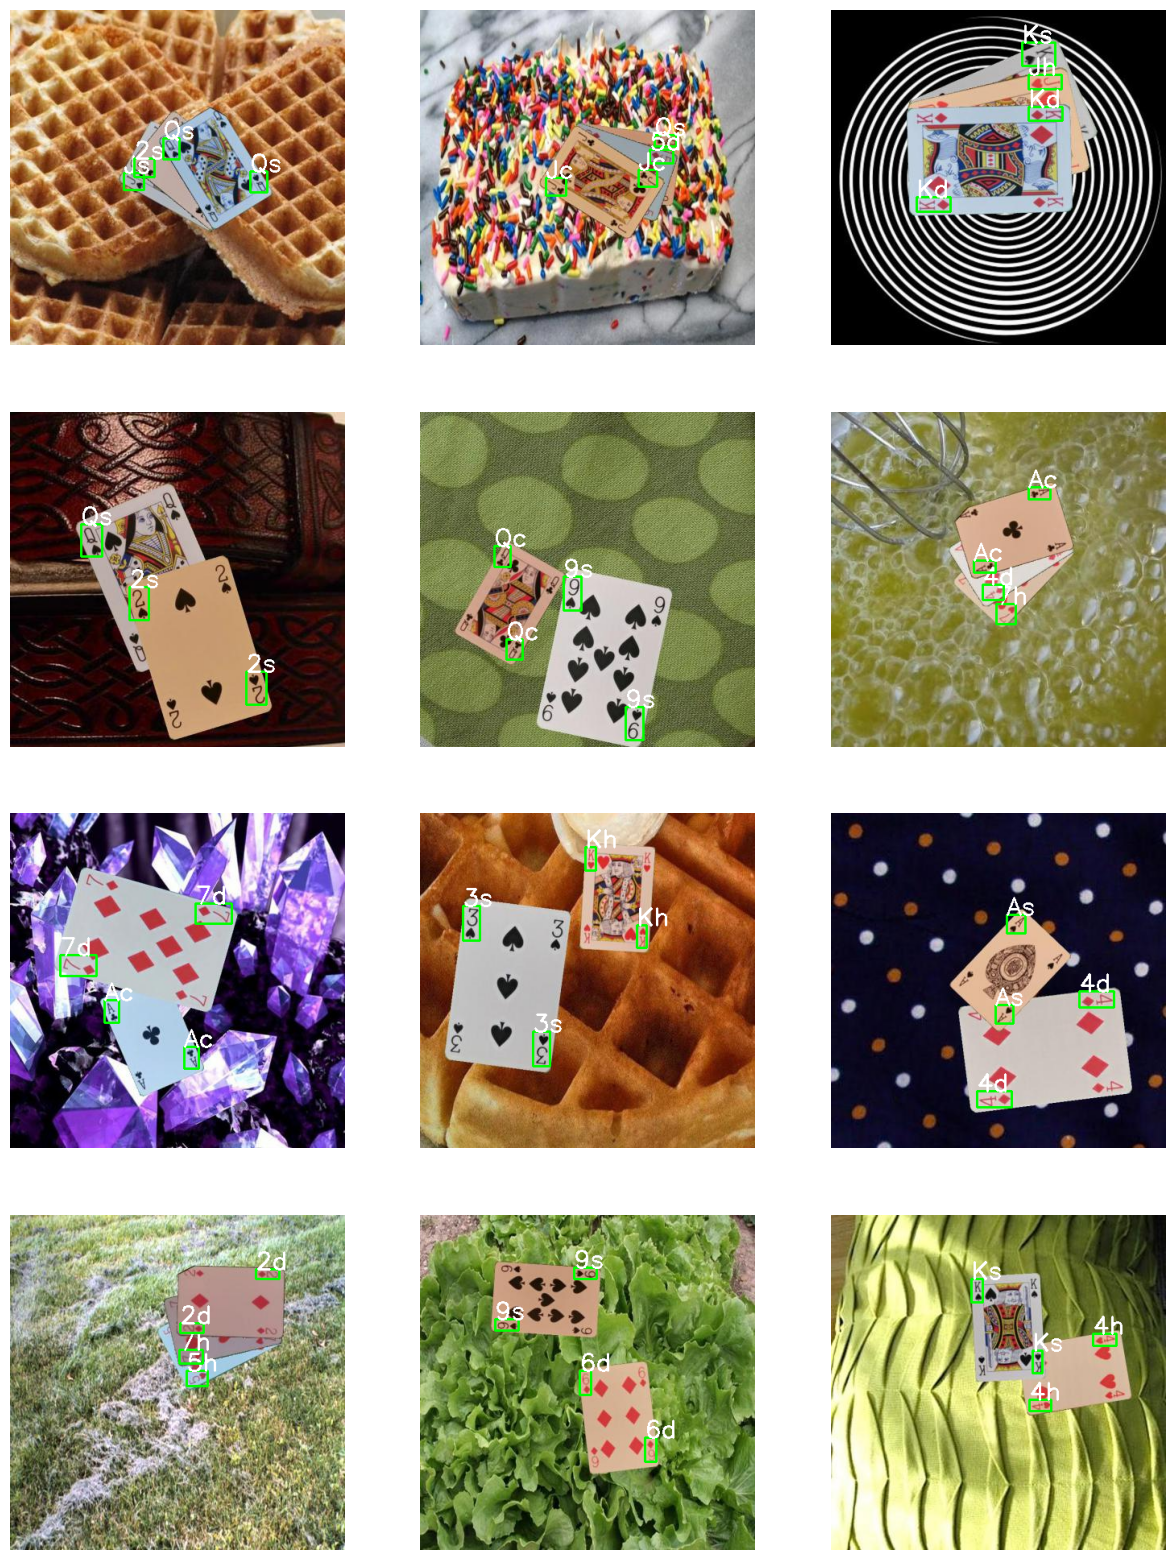

In [15]:
# Visualize 6 sample images with bounding boxes

visualize_image_with_annotation_bboxes(train_images, train_labels)

In [16]:
# Read a image by path
image_path = os.path.join(train_images, os.listdir(train_images)[-1])
image = cv2.imread(image_path)

# Get the size of the image
height, width, channels = image.shape
print('The image has dimensions {}x{} and {} channels'.format(height, width, channels))

The image has dimensions 416x416 and 3 channels


# **3. TRAINING**

In [17]:
# Load a pretrained nano model
model = YOLO('yolov8n.pt')

# free up GPU memory
torch.cuda.empty_cache()

# Training the model
results = model.train(
    data= yaml_path,
    epochs = 100,
    imgsz = (height, width, channels),
    seed = 42,
    batch = 8,
    workers = 4,
    patience = 5,
    name = 'yolov8n_custom')

Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 7967MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/home/playing-cards-object-detection-dataset/data.yaml, epochs=100, time=None, patience=5, batch=8, imgsz=(416, 416, 3), save=True, save_period=-1, cache=False, device=None, workers=4, project=None, name=yolov8n_custom, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, sa

train: Scanning /home/playing-cards-object-detection-dataset/train/labels.cache... 14000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14000/14000 [00:00<?, ?it/s]
val: Scanning /home/playing-cards-object-detection-dataset/valid/labels.cache... 4000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4000/4000 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8n_custom/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 4 dataloader workers
Logging results to runs/detect/yolov8n_custom
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100     0.835G      1.199      4.032     0.9191         37        416: 100%|██████████| 1750/1750 [01:11<00:00, 24.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:11<00:00, 21.88it/s]


                   all       4000      15159      0.069      0.236     0.0651     0.0529

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100     0.881G     0.9489      2.516     0.8645         48        416: 100%|██████████| 1750/1750 [01:08<00:00, 25.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 23.94it/s]


                   all       4000      15159      0.332      0.593      0.412      0.337

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100     0.862G     0.9378      1.897     0.8632         46        416: 100%|██████████| 1750/1750 [01:05<00:00, 26.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 23.25it/s]


                   all       4000      15159      0.616      0.735      0.714      0.588

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100     0.858G     0.8855      1.497     0.8548         37        416: 100%|██████████| 1750/1750 [01:06<00:00, 26.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.55it/s]


                   all       4000      15159      0.789      0.858      0.872      0.746

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100     0.851G     0.8095      1.227     0.8408         26        416: 100%|██████████| 1750/1750 [01:06<00:00, 26.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.47it/s]


                   all       4000      15159      0.842      0.894      0.923      0.798

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100     0.849G     0.7578      1.055     0.8343         54        416: 100%|██████████| 1750/1750 [01:05<00:00, 26.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.29it/s]


                   all       4000      15159       0.85      0.922      0.933      0.815

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100     0.849G     0.7272     0.9481     0.8295         44        416: 100%|██████████| 1750/1750 [01:06<00:00, 26.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.44it/s]

                   all       4000      15159       0.89      0.922      0.957      0.842



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100     0.849G      0.705     0.8716     0.8252         46        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.83it/s]


                   all       4000      15159      0.886      0.938      0.958       0.85

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100     0.847G     0.6874     0.8188     0.8215         40        416: 100%|██████████| 1750/1750 [01:02<00:00, 28.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.86it/s]


                   all       4000      15159      0.903      0.945      0.967      0.859

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100     0.847G     0.6742     0.7772       0.82         50        416: 100%|██████████| 1750/1750 [01:02<00:00, 27.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.86it/s]

                   all       4000      15159      0.916      0.963      0.972      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100     0.845G     0.6579     0.7323      0.818         65        416: 100%|██████████| 1750/1750 [01:05<00:00, 26.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 23.74it/s]

                   all       4000      15159      0.927      0.963      0.976      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100     0.845G     0.6481     0.7032     0.8167         60        416: 100%|██████████| 1750/1750 [01:06<00:00, 26.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.69it/s]


                   all       4000      15159      0.918      0.966      0.973      0.869

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100     0.845G     0.6344     0.6804     0.8138         40        416: 100%|██████████| 1750/1750 [01:06<00:00, 26.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.53it/s]

                   all       4000      15159      0.935      0.967      0.979      0.878



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100     0.845G     0.6265     0.6584     0.8148         35        416: 100%|██████████| 1750/1750 [01:05<00:00, 26.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 23.64it/s]

                   all       4000      15159      0.942      0.965       0.98       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100     0.845G     0.6224     0.6432      0.812         35        416: 100%|██████████| 1750/1750 [01:06<00:00, 26.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.83it/s]

                   all       4000      15159      0.929      0.981      0.977      0.882



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100     0.847G     0.6125     0.6269     0.8107         50        416: 100%|██████████| 1750/1750 [01:06<00:00, 26.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.63it/s]

                   all       4000      15159      0.956       0.97      0.985      0.895



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100     0.845G     0.6042     0.6052     0.8102         46        416: 100%|██████████| 1750/1750 [01:05<00:00, 26.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.88it/s]


                   all       4000      15159      0.945      0.982      0.982      0.893

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100     0.845G     0.5952     0.5935     0.8098         44        416: 100%|██████████| 1750/1750 [01:02<00:00, 28.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.58it/s]


                   all       4000      15159      0.945      0.979      0.981      0.892

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100     0.845G      0.592     0.5865     0.8089         47        416: 100%|██████████| 1750/1750 [01:01<00:00, 28.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.31it/s]


                   all       4000      15159      0.936      0.989      0.978      0.891

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100     0.845G     0.5878     0.5752     0.8097         36        416: 100%|██████████| 1750/1750 [01:02<00:00, 28.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.93it/s]


                   all       4000      15159      0.952      0.976      0.983      0.895

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100     0.845G     0.5801     0.5636     0.8078         30        416: 100%|██████████| 1750/1750 [01:02<00:00, 27.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.75it/s]


                   all       4000      15159      0.956      0.978      0.984      0.896

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100     0.845G     0.5757     0.5589     0.8076         48        416: 100%|██████████| 1750/1750 [01:01<00:00, 28.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.42it/s]


                   all       4000      15159      0.949      0.979      0.982      0.893

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100     0.845G      0.572     0.5493      0.807         33        416: 100%|██████████| 1750/1750 [01:02<00:00, 28.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.85it/s]

                   all       4000      15159      0.946      0.988      0.981      0.894



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100     0.845G     0.5678     0.5428     0.8052         52        416: 100%|██████████| 1750/1750 [01:02<00:00, 28.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.13it/s]

                   all       4000      15159      0.939      0.994      0.981      0.897



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100     0.845G     0.5686     0.5406     0.8056         44        416: 100%|██████████| 1750/1750 [01:01<00:00, 28.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.86it/s]


                   all       4000      15159      0.949      0.987      0.982      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100     0.845G     0.5633     0.5302     0.8043         38        416: 100%|██████████| 1750/1750 [01:02<00:00, 27.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 23.87it/s]

                   all       4000      15159      0.945       0.99      0.981        0.9



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100     0.845G     0.5551     0.5235     0.8047         35        416: 100%|██████████| 1750/1750 [01:01<00:00, 28.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.79it/s]

                   all       4000      15159      0.961      0.975      0.984      0.903



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100     0.845G     0.5562      0.519     0.8049         32        416: 100%|██████████| 1750/1750 [01:02<00:00, 28.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.98it/s]


                   all       4000      15159      0.946      0.992      0.983      0.903

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100     0.845G     0.5487     0.5118     0.8045         31        416: 100%|██████████| 1750/1750 [01:02<00:00, 28.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.73it/s]


                   all       4000      15159      0.943      0.996      0.979      0.901

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100     0.845G     0.5452     0.5066     0.8031         48        416: 100%|██████████| 1750/1750 [01:01<00:00, 28.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.82it/s]


                   all       4000      15159      0.946      0.991      0.982      0.901

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100     0.845G     0.5476     0.5096     0.8022         41        416: 100%|██████████| 1750/1750 [01:02<00:00, 27.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.91it/s]


                   all       4000      15159      0.953      0.985      0.983      0.905

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100     0.845G     0.5391     0.4974     0.8017         41        416: 100%|██████████| 1750/1750 [01:01<00:00, 28.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.81it/s]


                   all       4000      15159      0.948      0.993      0.982      0.905

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100     0.843G     0.5392     0.4957     0.8022         42        416: 100%|██████████| 1750/1750 [01:02<00:00, 27.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:09<00:00, 25.00it/s]


                   all       4000      15159      0.952      0.989      0.983      0.907

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100     0.845G     0.5344     0.4923     0.8019         50        416: 100%|██████████| 1750/1750 [01:02<00:00, 27.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.49it/s]

                   all       4000      15159      0.957      0.984      0.984      0.908



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100     0.845G     0.5284     0.4863     0.8016         30        416: 100%|██████████| 1750/1750 [01:02<00:00, 28.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.30it/s]


                   all       4000      15159      0.961      0.982      0.985       0.91

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100     0.845G     0.5295     0.4847     0.8016         54        416: 100%|██████████| 1750/1750 [01:07<00:00, 26.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.61it/s]

                   all       4000      15159      0.957      0.984      0.984       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100     0.843G     0.5256     0.4805     0.8014         51        416: 100%|██████████| 1750/1750 [01:06<00:00, 26.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.00it/s]

                   all       4000      15159       0.96      0.984      0.985      0.911



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100     0.845G     0.5203     0.4726     0.8009         36        416: 100%|██████████| 1750/1750 [01:06<00:00, 26.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.49it/s]

                   all       4000      15159       0.95      0.993      0.983       0.91



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100     0.845G     0.5198     0.4724     0.7998         55        416: 100%|██████████| 1750/1750 [01:07<00:00, 26.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.37it/s]

                   all       4000      15159      0.957      0.987      0.984      0.912



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100     0.845G     0.5177      0.465     0.7999         28        416: 100%|██████████| 1750/1750 [01:07<00:00, 26.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.34it/s]

                   all       4000      15159      0.953      0.991      0.984      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100     0.843G     0.5172     0.4637     0.8001         37        416: 100%|██████████| 1750/1750 [01:06<00:00, 26.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.10it/s]

                   all       4000      15159      0.956      0.987      0.984      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100     0.845G     0.5141     0.4644     0.7992         49        416: 100%|██████████| 1750/1750 [01:06<00:00, 26.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.30it/s]

                   all       4000      15159      0.956       0.99      0.984      0.913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100     0.845G     0.5125     0.4583     0.7993         37        416: 100%|██████████| 1750/1750 [01:06<00:00, 26.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.76it/s]

                   all       4000      15159       0.96      0.984      0.985      0.916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100     0.845G     0.5066     0.4548     0.7983         32        416: 100%|██████████| 1750/1750 [01:07<00:00, 26.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.42it/s]

                   all       4000      15159      0.956       0.99      0.985      0.917



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100     0.843G     0.5075     0.4543     0.7981         51        416: 100%|██████████| 1750/1750 [01:07<00:00, 26.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.42it/s]

                   all       4000      15159      0.966      0.983      0.986       0.92



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100     0.845G     0.5064     0.4499     0.7976         46        416: 100%|██████████| 1750/1750 [01:06<00:00, 26.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.74it/s]

                   all       4000      15159      0.963      0.986      0.986      0.921



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100     0.845G     0.5008      0.446     0.7985         60        416: 100%|██████████| 1750/1750 [01:08<00:00, 25.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.43it/s]

                   all       4000      15159      0.966      0.982      0.987      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100     0.845G     0.4988     0.4427     0.7981         27        416: 100%|██████████| 1750/1750 [01:08<00:00, 25.58it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.16it/s]


                   all       4000      15159      0.967      0.982      0.987      0.923

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100     0.843G     0.4954     0.4393     0.7976         59        416: 100%|██████████| 1750/1750 [01:06<00:00, 26.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.56it/s]

                   all       4000      15159      0.964      0.983      0.986      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100     0.845G     0.4942      0.434     0.7978         37        416: 100%|██████████| 1750/1750 [01:07<00:00, 25.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.42it/s]

                   all       4000      15159      0.962      0.985      0.986      0.923



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100     0.843G     0.4922      0.436     0.7959         59        416: 100%|██████████| 1750/1750 [01:07<00:00, 25.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.07it/s]

                   all       4000      15159      0.962      0.987      0.986      0.924



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100     0.845G     0.4918     0.4348     0.7968         35        416: 100%|██████████| 1750/1750 [01:07<00:00, 26.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.32it/s]

                   all       4000      15159      0.966      0.983      0.986      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100     0.843G     0.4893     0.4339     0.7953         44        416: 100%|██████████| 1750/1750 [01:08<00:00, 25.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.33it/s]

                   all       4000      15159      0.967      0.983      0.987      0.925



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100     0.843G     0.4878     0.4275     0.7967         52        416: 100%|██████████| 1750/1750 [01:07<00:00, 25.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 23.90it/s]

                   all       4000      15159      0.966      0.985      0.987      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100     0.845G      0.486     0.4264     0.7958         45        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.86it/s]

                   all       4000      15159      0.966      0.985      0.987      0.926



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100     0.845G      0.483     0.4195     0.7974         63        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.64it/s]


                   all       4000      15159      0.966      0.985      0.987      0.926

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100     0.843G     0.4813     0.4188     0.7966         28        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.49it/s]

                   all       4000      15159      0.966      0.984      0.987      0.928



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100     0.845G     0.4787     0.4164     0.7951         33        416: 100%|██████████| 1750/1750 [01:04<00:00, 27.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.99it/s]


                   all       4000      15159      0.966      0.985      0.987      0.928

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100     0.845G     0.4779     0.4125     0.7961         43        416: 100%|██████████| 1750/1750 [01:04<00:00, 27.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.30it/s]

                   all       4000      15159      0.967      0.985      0.987      0.929



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100     0.845G     0.4771     0.4145     0.7951         30        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.71it/s]


                   all       4000      15159      0.967      0.986      0.987       0.93

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100     0.843G     0.4733     0.4076     0.7947         39        416: 100%|██████████| 1750/1750 [01:04<00:00, 27.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.74it/s]

                   all       4000      15159      0.968      0.985      0.987       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100     0.845G     0.4709     0.4057     0.7948         48        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.24it/s]

                   all       4000      15159      0.969      0.985      0.987       0.93



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100     0.845G     0.4717     0.4069     0.7947         38        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.83it/s]

                   all       4000      15159       0.97      0.983      0.987      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100     0.843G     0.4677     0.3992     0.7943         31        416: 100%|██████████| 1750/1750 [01:04<00:00, 27.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.93it/s]


                   all       4000      15159      0.969      0.985      0.987      0.931

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100     0.845G     0.4673     0.4025     0.7946         46        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.26it/s]

                   all       4000      15159      0.969      0.985      0.987      0.931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100     0.845G     0.4655     0.3985     0.7933         37        416: 100%|██████████| 1750/1750 [01:04<00:00, 27.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.80it/s]


                   all       4000      15159       0.97      0.985      0.988      0.931

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100     0.843G     0.4638     0.3943     0.7932         23        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.19it/s]


                   all       4000      15159       0.97      0.985      0.988      0.932

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100     0.845G     0.4637     0.3963     0.7922         26        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.80it/s]

                   all       4000      15159       0.97      0.986      0.988      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100     0.843G     0.4578     0.3885      0.792         54        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.85it/s]


                   all       4000      15159       0.97      0.985      0.988      0.932

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100     0.845G      0.456     0.3861     0.7936         51        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.49it/s]

                   all       4000      15159      0.969      0.985      0.988      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100     0.845G     0.4559     0.3867     0.7923         35        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.69it/s]

                   all       4000      15159      0.969      0.986      0.988      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100     0.845G     0.4553     0.3828     0.7933         32        416: 100%|██████████| 1750/1750 [01:04<00:00, 27.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.70it/s]

                   all       4000      15159      0.969      0.985      0.988      0.932



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100     0.845G     0.4526     0.3798     0.7932         42        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.72it/s]

                   all       4000      15159      0.969      0.985      0.988      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100     0.845G     0.4507     0.3796     0.7921         39        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.72it/s]

                   all       4000      15159       0.97      0.985      0.988      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100     0.845G     0.4491     0.3751     0.7911         36        416: 100%|██████████| 1750/1750 [01:04<00:00, 27.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.00it/s]

                   all       4000      15159      0.969      0.985      0.988      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100     0.845G     0.4455     0.3705     0.7916         34        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.16it/s]

                   all       4000      15159      0.968      0.986      0.988      0.933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100     0.843G      0.446     0.3716     0.7907         42        416: 100%|██████████| 1750/1750 [01:04<00:00, 27.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.66it/s]

                   all       4000      15159      0.969      0.986      0.988      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100     0.845G     0.4436     0.3682     0.7918         54        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.81it/s]

                   all       4000      15159      0.968      0.987      0.988      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100     0.845G     0.4417     0.3669     0.7917         35        416: 100%|██████████| 1750/1750 [01:04<00:00, 27.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.91it/s]

                   all       4000      15159      0.969      0.987      0.988      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100     0.843G      0.439     0.3657     0.7906         43        416: 100%|██████████| 1750/1750 [01:04<00:00, 27.22it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.22it/s]

                   all       4000      15159       0.97      0.986      0.988      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100     0.843G     0.4392     0.3626     0.7902         33        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.38it/s]

                   all       4000      15159       0.97      0.986      0.988      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100     0.845G     0.4355     0.3602     0.7912         57        416: 100%|██████████| 1750/1750 [01:05<00:00, 26.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.52it/s]

                   all       4000      15159       0.97      0.985      0.988      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100     0.843G     0.4346     0.3593     0.7909         37        416: 100%|██████████| 1750/1750 [01:04<00:00, 27.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.65it/s]


                   all       4000      15159      0.971      0.985      0.988      0.934

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100     0.845G      0.432     0.3537      0.791         35        416: 100%|██████████| 1750/1750 [01:04<00:00, 26.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.11it/s]

                   all       4000      15159      0.971      0.985      0.988      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100     0.845G     0.4309     0.3535     0.7901         55        416: 100%|██████████| 1750/1750 [01:05<00:00, 26.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.35it/s]

                   all       4000      15159      0.971      0.986      0.988      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100     0.845G     0.4299      0.352       0.79         53        416: 100%|██████████| 1750/1750 [01:04<00:00, 27.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.77it/s]

                   all       4000      15159       0.97      0.986      0.988      0.934



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100     0.845G     0.4289     0.3503     0.7902         57        416: 100%|██████████| 1750/1750 [01:06<00:00, 26.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.43it/s]

                   all       4000      15159       0.97      0.987      0.988      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100     0.845G     0.4262     0.3482     0.7896         50        416: 100%|██████████| 1750/1750 [01:04<00:00, 27.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.06it/s]

                   all       4000      15159       0.97      0.987      0.988      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100     0.845G     0.4258     0.3462     0.7896         48        416: 100%|██████████| 1750/1750 [01:05<00:00, 26.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.26it/s]

                   all       4000      15159       0.97      0.987      0.988      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100     0.845G     0.4223     0.3419      0.789         66        416: 100%|██████████| 1750/1750 [01:05<00:00, 26.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.50it/s]

                   all       4000      15159       0.97      0.987      0.988      0.935


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100     0.841G     0.3846     0.2683     0.7823         31        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.55it/s]

                   all       4000      15159       0.97      0.987      0.988      0.935



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100     0.841G     0.3783     0.2642     0.7814         28        416: 100%|██████████| 1750/1750 [01:04<00:00, 27.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.83it/s]


                   all       4000      15159       0.97      0.988      0.988      0.935

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100     0.839G     0.3768     0.2621     0.7806         31        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.34it/s]

                   all       4000      15159       0.97      0.988      0.988      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100     0.841G     0.3733     0.2594     0.7807         29        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.72it/s]


                   all       4000      15159       0.97      0.988      0.988      0.936

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100     0.841G     0.3713     0.2563     0.7812         30        416: 100%|██████████| 1750/1750 [01:04<00:00, 27.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.38it/s]

                   all       4000      15159       0.97      0.988      0.988      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100     0.841G     0.3694     0.2548     0.7802         27        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 23.96it/s]

                   all       4000      15159       0.97      0.988      0.988      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100     0.841G     0.3669       0.25     0.7806         30        416: 100%|██████████| 1750/1750 [01:04<00:00, 27.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.22it/s]

                   all       4000      15159       0.97      0.988      0.989      0.936



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100     0.841G     0.3639     0.2463     0.7794         27        416: 100%|██████████| 1750/1750 [01:04<00:00, 27.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.79it/s]


                   all       4000      15159      0.971      0.988      0.989      0.937

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100     0.839G     0.3632     0.2469     0.7807         28        416: 100%|██████████| 1750/1750 [01:03<00:00, 27.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.35it/s]

                   all       4000      15159      0.971      0.988      0.989      0.937



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100     0.841G     0.3625     0.2433     0.7795         31        416: 100%|██████████| 1750/1750 [01:04<00:00, 27.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 24.50it/s]

                   all       4000      15159      0.971      0.988      0.989      0.937



100 epochs completed in 2.088 hours.
Optimizer stripped from runs/detect/yolov8n_custom/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8n_custom/weights/best.pt, 6.2MB

Validating runs/detect/yolov8n_custom/weights/best.pt...
Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 7967MiB)
Model summary (fused): 168 layers, 3015788 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 250/250 [00:10<00:00, 22.76it/s]


                   all       4000      15159      0.971      0.988      0.989      0.937
                   10c        180        282      0.997          1      0.995      0.902
                   10d        188        290      0.997          1      0.995      0.901
                   10h        201        322      0.998          1      0.995      0.905
                   10s        165        250      0.997          1      0.995      0.905
                    2c        193        295      0.992          1      0.995       0.95
                    2d        167        259      0.997          1      0.995      0.953
                    2h        187        294      0.998          1      0.995      0.946
                    2s        192        299          1      0.995      0.995      0.945
                    3c        201        308      0.995          1      0.995      0.959
                    3d        167        250      0.996      0.996      0.995      0.952
                    3

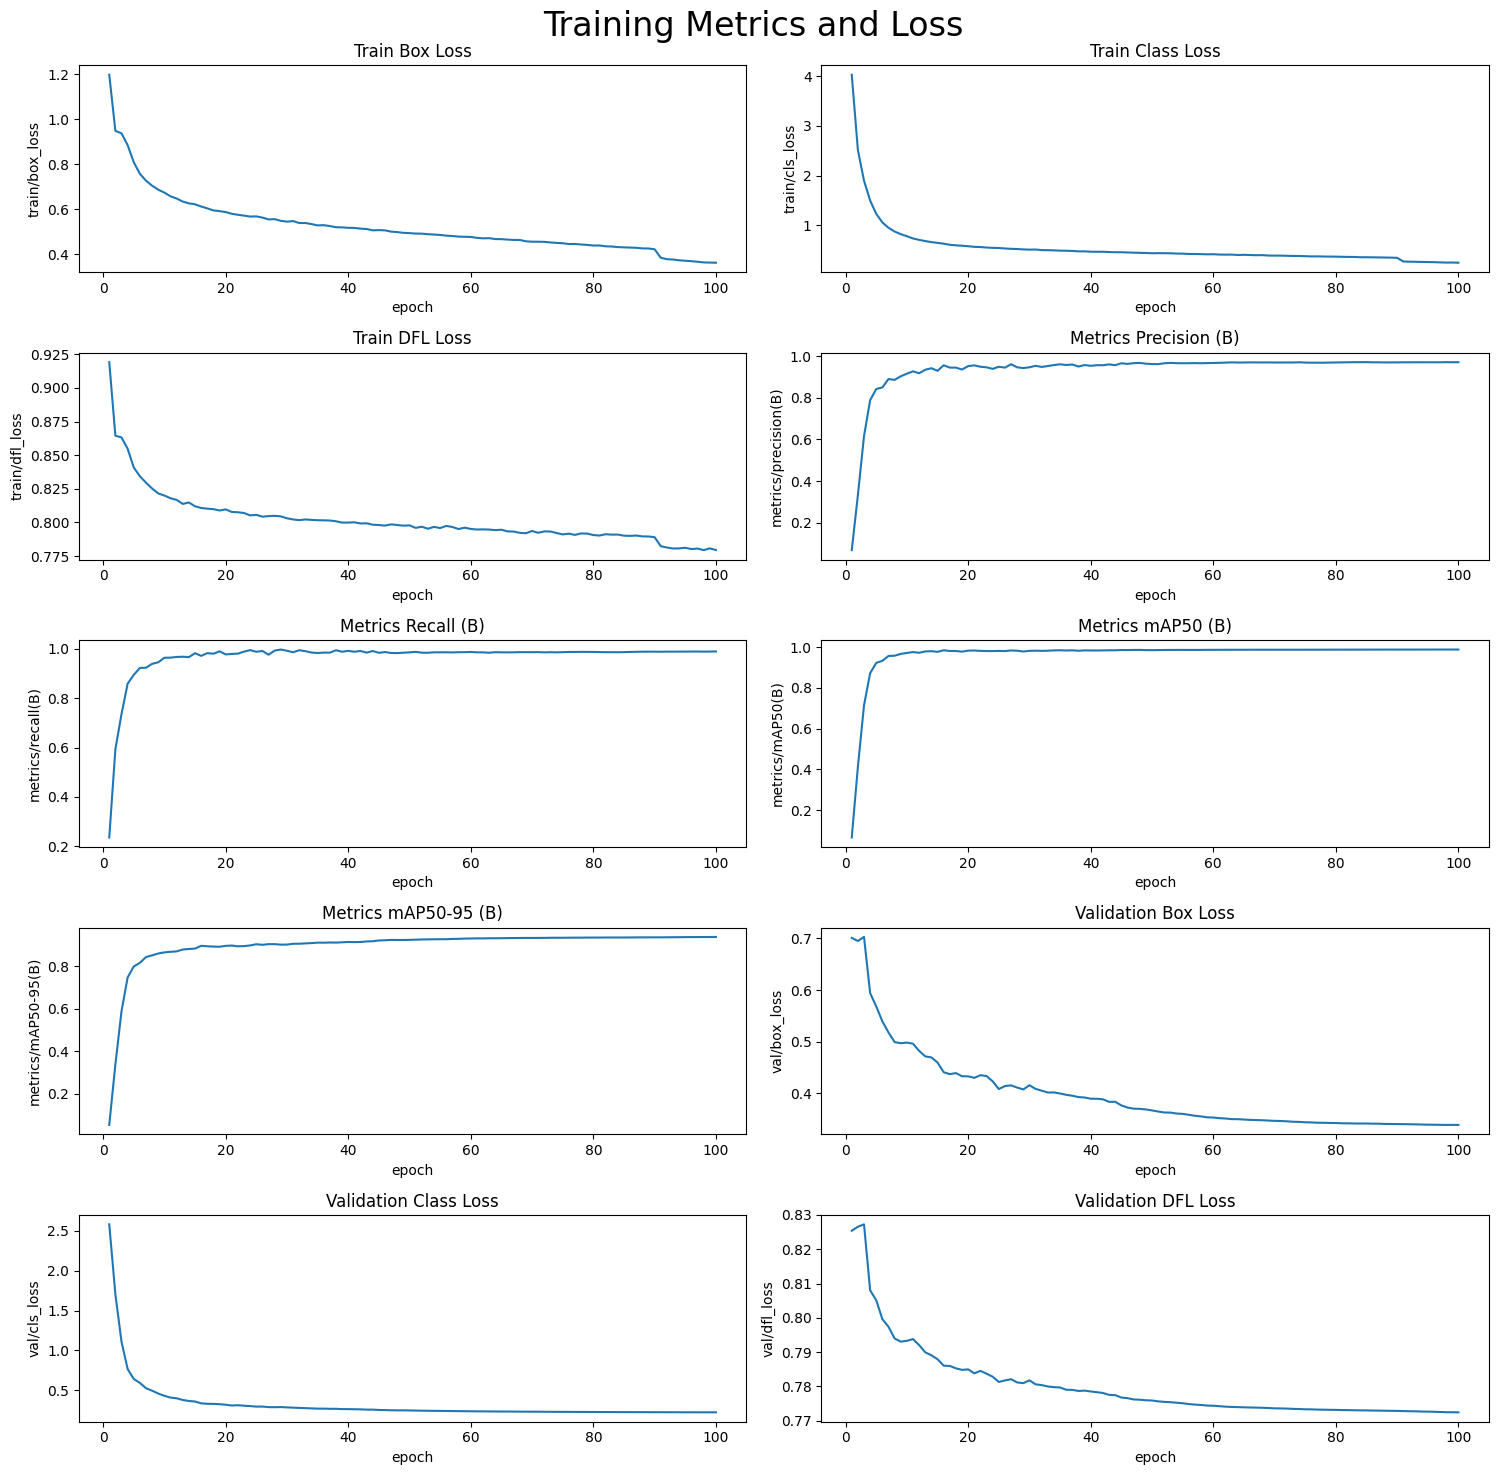

In [18]:
# plot the result

%matplotlib inline
# read in the results.csv file as a pandas dataframe
df = pd.read_csv('./runs/detect/yolov8n_custom/results.csv')
df.columns = df.columns.str.strip()

# create subplots using seaborn
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

# add suptitle and subheader
plt.suptitle('Training Metrics and Loss', fontsize=24)

# adjust top margin to make space for suptitle
plt.subplots_adjust(top=0.8)

# adjust spacing between subplots
plt.tight_layout()

plt.show()

# **4. EVALUATION**

In [19]:
# Loading the best performing model
model = YOLO('./runs/detect/yolov8n_custom/weights/best.pt')

# Evaluating the model on test dataset
metrics = model.val(conf=0.25, split='test')

Ultralytics YOLOv8.2.42 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (NVIDIA GeForce RTX 3070 Laptop GPU, 7967MiB)
Model summary (fused): 168 layers, 3015788 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /home/playing-cards-object-detection-dataset/test/labels.cache... 2000 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2000/2000 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 125/125 [00:06<00:00, 19.70it/s]


                   all       2000       7588      0.967      0.992      0.988      0.945
                   10c         89        137          1          1      0.995      0.922
                   10d        103        170          1          1      0.995      0.921
                   10h        100        149          1          1      0.995      0.938
                   10s         96        151          1          1      0.995      0.923
                    2c         90        139      0.986          1      0.995      0.964
                    2d        101        158      0.994          1      0.995      0.949
                    2h        100        156          1          1      0.995      0.954
                    2s         95        153          1      0.993      0.995       0.95
                    3c         98        155          1          1      0.995      0.962
                    3d         95        143      0.993          1      0.995      0.958
                    3

In [20]:
print(f"Mean Average Precision @.5:.95 : {metrics.box.map}")
print(f"Mean Average Precision @ .50   : {metrics.box.map50}")
print(f"Mean Average Precision @ .70   : {metrics.box.map75}")

Mean Average Precision @.5:.95 : 0.9447832633256676
Mean Average Precision @ .50   : 0.9883409186252206
Mean Average Precision @ .70   : 0.987539272163361


# **5. PREDICTION**

In [21]:
# Function to perform detections with trained model
def predict_detection(image_path):
    # Read the image
    image = cv2.imread(image_path)

    # Pass the image through the detection model and get the result
    detect_result = model(image)

    # Plot the detections
    detect_image = detect_result[0].plot()

    # Convert the image to RGB format
    detect_image = cv2.cvtColor(detect_image, cv2.COLOR_BGR2RGB)

    return detect_image


0: 416x416 2 7cs, 2 Kds, 2.8ms
Speed: 0.6ms preprocess, 2.8ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 2 9ss, 4 Ahs, 5.2ms
Speed: 0.9ms preprocess, 5.2ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 1 10s, 1 4h, 2 4ss, 3.9ms
Speed: 0.9ms preprocess, 3.9ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 2 8ss, 1 Ac, 1 Kh, 5.5ms
Speed: 1.0ms preprocess, 5.5ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 2 10cs, 2 Kcs, 5.0ms
Speed: 0.9ms preprocess, 5.0ms inference, 0.8ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 2 3ds, 2 8hs, 3.2ms
Speed: 0.5ms preprocess, 3.2ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 2 4cs, 2 7ds, 3.1ms
Speed: 0.6ms preprocess, 3.1ms inference, 0.6ms postprocess per image at shape (1, 3, 416, 416)

0: 416x416 3 Ass, 2 Kcs, 3.2ms
Speed: 0.5ms preprocess, 3.2ms inference, 0.6ms postprocess 

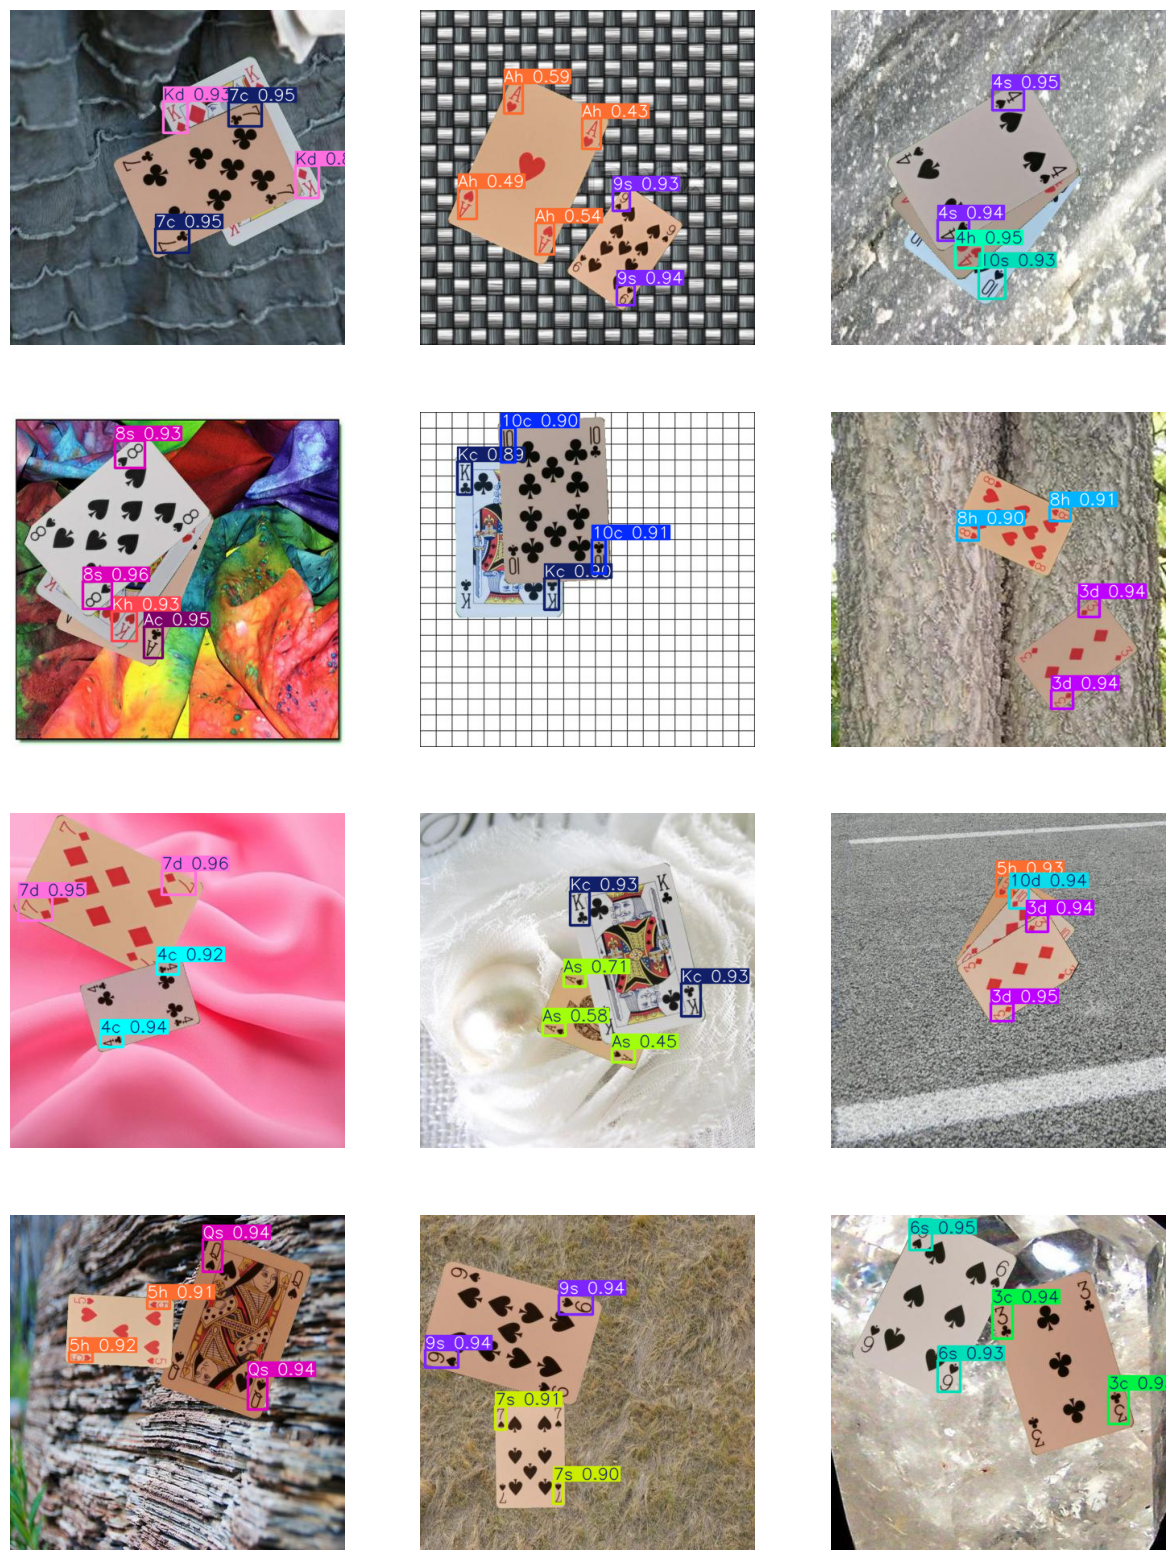

In [22]:
# Get list of all the image files in the test directory
image_files = sorted(os.listdir(test_images))

# Choose 12 random image files from the list
sample_image_files = random.sample(image_files, 12)

# Set up the plot
fig, axs = plt.subplots(4, 3, figsize=(15, 20))

# Loop over the random images and plot the detections of the trained model
for i, image_file in enumerate(sample_image_files):
    row = i // 3
    col = i % 3

    # Load the current image and run object detection
    image_path = os.path.join(test_images, image_file)
    detect_image = predict_detection(image_path)

    axs[row, col].imshow(detect_image)
    axs[row, col].axis('off')

plt.show()